based on <https://www.d2l.ai/chapter_natural-language-processing-pretraining/word2vec-pretraining.html>

Environment

* WSL2 Ubuntu22.04.02 LTS
* Python 3.10.14
* CUDA 12.1
* torch 2.2.2

torch 1.12.0 with Python 3.9 is also tested

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np
from champ_item_embedding import *

In [2]:
loss = SigmoidBCELoss()
net = build_net()
dataloader = build_dataloader()

In [3]:
losses = train(net, dataloader, loss)

1
2
3
4
5
6
7
8
9
10


In [4]:
file_path = "champ_item_embedding.pth"
torch.save(net.state_dict(), file_path)

In [5]:
net = build_net()
net.load_state_dict(torch.load(file_path))

<All keys matched successfully>

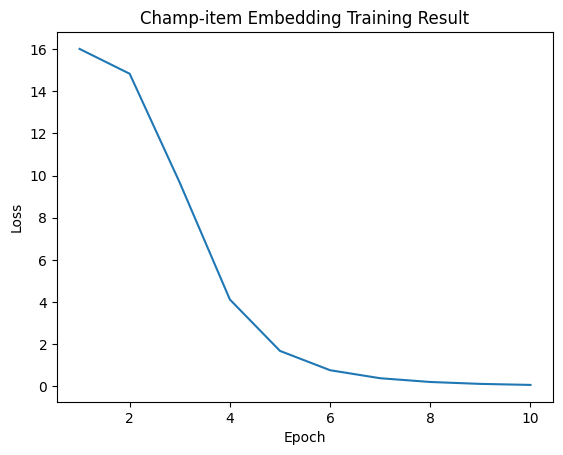

In [6]:
plt.plot(np.arange(len(losses)) + 1, losses)
plt.title("Champ-item Embedding Training Result")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.savefig("champ-item_embedding_training_result.pdf", bbox_inches="tight")

In [7]:
with open("idx2item.json", "r") as f:
    idx2item = json.load(f)
with open("idx2champ.json", "r") as f:
    idx2champ = json.load(f)

In [8]:
W1 = net[0].weight.data
W2 = net[1].weight.data

first = W1[0]
cos = torch.mv(W1, first) / torch.sqrt(
    torch.sum(W1 * W1, dim=1) * torch.sum(first * first) + 1e-9
)

topk = torch.topk(cos, ITEM_SIZE)[1].cpu().numpy().astype("int32")
for i in topk[:10]:
    print(f"cosine sim={float(cos[i]):.3f}: {idx2champ[str(i)]}")

cosine sim=1.000: Aatrox
cosine sim=0.995: Samira
cosine sim=0.994: Lee Sin
cosine sim=0.993: Bel'Veth
cosine sim=0.993: Kled
cosine sim=0.991: Briar
cosine sim=0.991: Nocturne
cosine sim=0.991: Xin Zhao
cosine sim=0.990: Vi
cosine sim=0.990: Naafiri


In [9]:
W1 = net[0].weight.data
W2 = net[1].weight.data

first = W2[122]
cos = torch.mv(W2, first) / torch.sqrt(
    torch.sum(W2 * W2, dim=1) * torch.sum(first * first) + 1e-9
)

topk = torch.topk(cos, ITEM_SIZE)[1].cpu().numpy().astype("int32")
for i in topk[:10]:
    print(f"cosine sim={float(cos[i]):.3f}: {idx2item[str(i)]}")

cosine sim=1.000: Thornmail
cosine sim=0.988: Spirit Visage
cosine sim=0.986: Bramble Vest
cosine sim=0.982: Sunfire Aegis
cosine sim=0.982: Kaenic Rookern
cosine sim=0.980: Force of Nature
cosine sim=0.979: Dead Man's Plate
cosine sim=0.978: Randuin's Omen
cosine sim=0.978: Frozen Heart
cosine sim=0.976: Jak'Sho, The Protean


In [10]:
W1 = net[0].weight.data
W2 = net[1].weight.data

first = W1[0]
cos = torch.mv(W2, first) / torch.sqrt(
    torch.sum(W2 * W2, dim=1) * torch.sum(first * first) + 1e-9
)

topk = torch.topk(cos, ITEM_SIZE)[1].cpu().numpy().astype("int32")
for i in topk[:20]:
    print(f"cosine sim={float(cos[i]):.3f}: {idx2item[str(i)]}")

cosine sim=0.995: Eclipse
cosine sim=0.995: Stridebreaker
cosine sim=0.994: Serrated Dirk
cosine sim=0.993: Death's Dance
cosine sim=0.992: Executioner's Calling
cosine sim=0.991: Ravenous Hydra
cosine sim=0.990: Spear of Shojin
cosine sim=0.990: Edge of Night
cosine sim=0.990: B. F. Sword
cosine sim=0.987: Profane Hydra
cosine sim=0.986: Guardian Angel
cosine sim=0.986: Chempunk Chainsword
cosine sim=0.986: Youmuu's Wake
cosine sim=0.986: Black Cleaver
cosine sim=0.985: Serpent's Fang
cosine sim=0.985: Maw of Malmortius
cosine sim=0.985: Hullbreaker
cosine sim=0.985: Tiamat
cosine sim=0.984: Sundered Sky
cosine sim=0.984: Opportunity
